In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold

In [15]:
data=pd.read_csv("adult.csv")

In [16]:
data.head()  ## our target in this data is income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
data.shape  # no.of rows and columns

(32561, 15)

#### First we rename the columns according to our understanding in a  more readable and easy to use way

In [18]:
data = data.rename({'fnlwgt': 'final_weight', 'education.num': 'education_num','marital.status':'marital_status',
                   'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hoursperweek',
                    'native.country':'native_country'}, axis=1) 

In [19]:
data.info() ## going through the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final_weight      32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hoursperweek      32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
data.isnull().sum()  #to see all null values if any

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hoursperweek      0
native_country    0
income            0
dtype: int64

#### So we see there are no null values. But we have some special characters in this dataset that need to be removed and altered to a null value for better computation and analysis.

In [21]:
data=data.replace("?",np.nan)  # replacing with nan 

In [22]:
## identifying categorical data columns and numerical data columns
num_col=data.select_dtypes(include=['int64','float64']).columns
cat_col=data.select_dtypes(include=['object']).columns
print(" Numerical columns are:\n",num_col, "\n","Categorical are: \n", cat_col)

 Numerical columns are:
 Index(['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss',
       'hoursperweek'],
      dtype='object') 
 Categorical are: 
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [23]:
## finding unique values of each categorical column
for i in cat_col:
    print("Column Name: {}\n{}".format( i,data[i].unique())) 

Column Name: workclass
[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Column Name: education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Column Name: marital_status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Column Name: occupation
[nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Column Name: relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Column Name: race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Column Name: sex
['Female' 'Male']
Column Name: native_country
['Un

In [24]:
data.income.replace(['<=50K','>50K'],[0,1],inplace=True)

## Base Model

In [25]:
data_dummies=pd.get_dummies(data.drop("income",axis=1),drop_first=True)

In [26]:
x=data_dummies
y=data['income']

In [27]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.20,stratify=y,random_state=7)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [34]:
ypred_base=lr.fit(xtrain, ytrain).predict(xtest)

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import classification_report, precision_score, accuracy_score
print(classification_report(ytest, ypred_base))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      4945
           1       0.70      0.26      0.38      1568

   micro avg       0.80      0.80      0.80      6513
   macro avg       0.75      0.61      0.63      6513
weighted avg       0.78      0.80      0.76      6513



In [37]:
print("accuracy_score",accuracy_score(ytest, ypred_base))

accuracy_score 0.7951788730231844


### Univariate Analysis

In [12]:
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

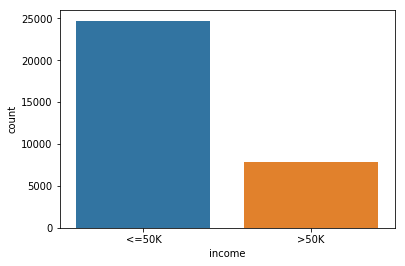

In [13]:
sns.countplot(data.income)

#### We see imbalanced data with people having income <=50000 as 3 times the people with having income >50K

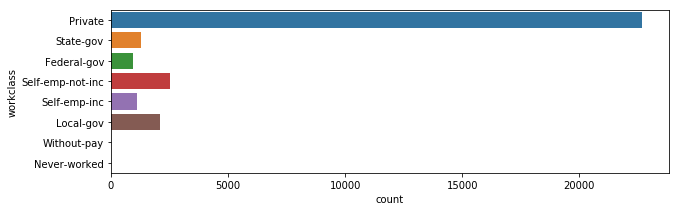

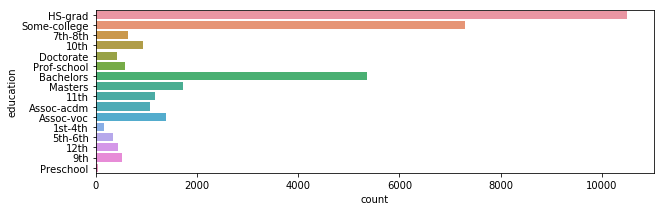

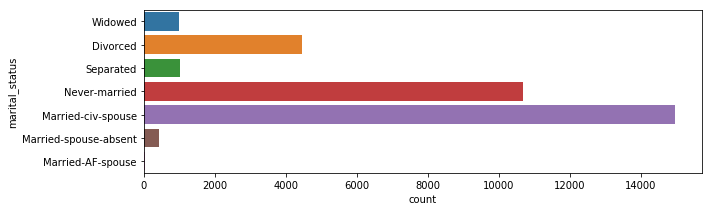

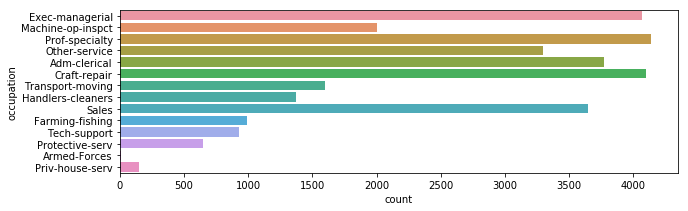

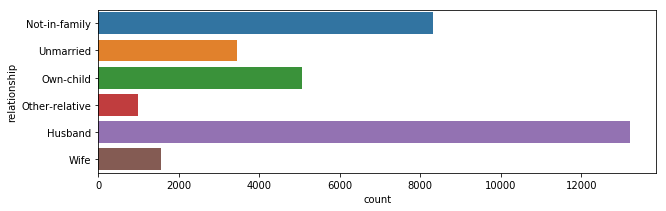

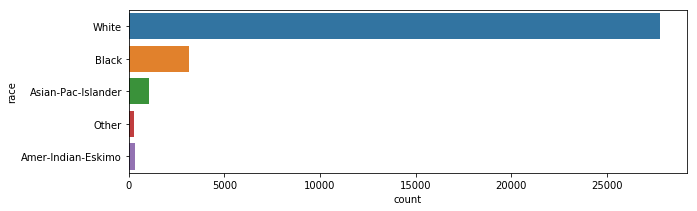

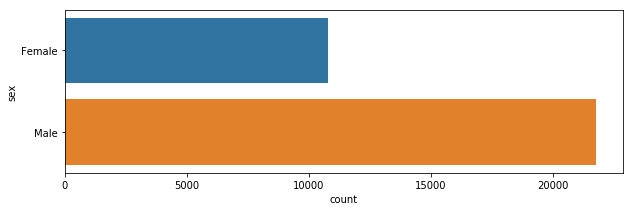

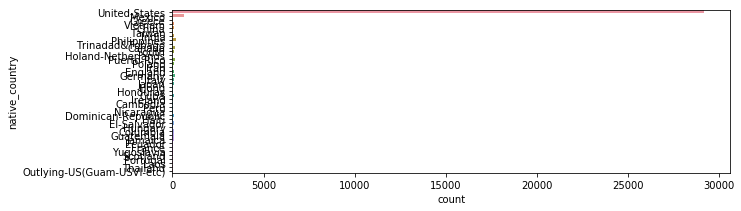

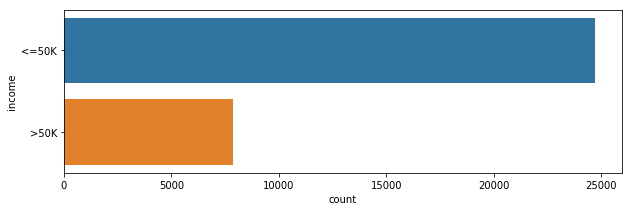

In [14]:
for i in cat_col:                ## graph for all the categorical features
    plt.figure(figsize=(10,3))
    sns.countplot(data=data,y=i)
    plt.show()

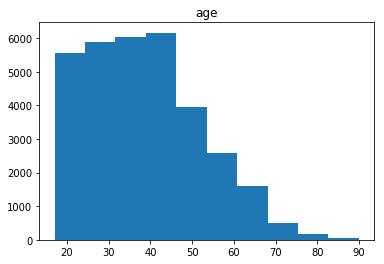

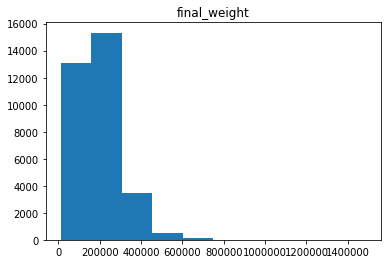

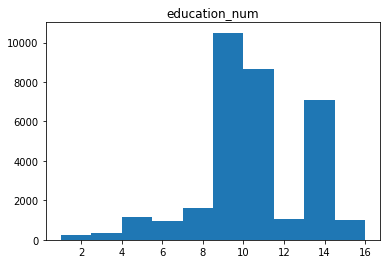

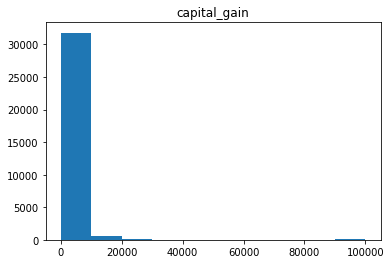

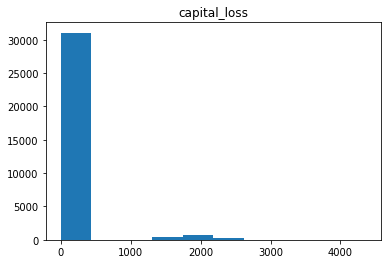

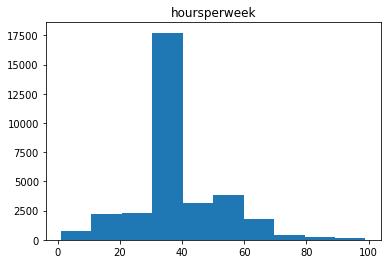

In [15]:
for i in num_col:
    plt.hist(data=data,x=i)
    plt.title(i)
    plt.show()

### Bivariate Analysis

In [16]:
data.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
data['income']=data.income.map({'<=50K':0,">50K":1})

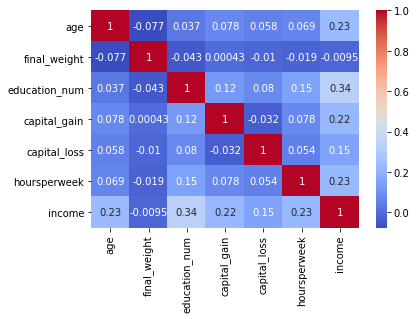

In [18]:
sns.heatmap(data.corr(),annot=True,cmap = "coolwarm")

 #### No numerical feature is highly correlated to target but still we can see hours per week , education num, age and capital gain are correlated
 

In [19]:
data.native_country.unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [20]:
data.sex.value_counts(normalize=True)

Male      0.669205
Female    0.330795
Name: sex, dtype: float64

In [21]:
data.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hoursperweek', 'native_country',
       'income'],
      dtype='object')

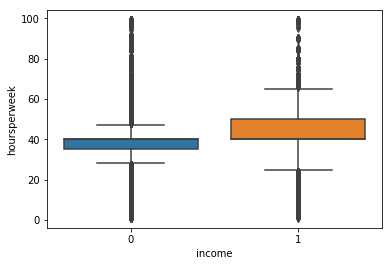

In [22]:
sns.boxplot(data.income,data.hoursperweek) ## getting two classes on the basis of hours per week

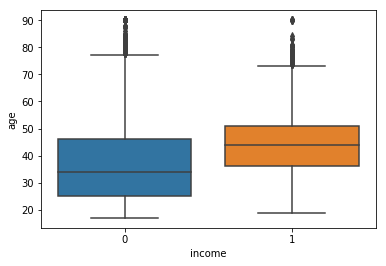

In [23]:
sns.boxplot(data.income,data.age)

In [24]:
data.workclass.isnull().sum()

1836

In [25]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [26]:
## filling null values with mode

In [38]:
data.workclass.fillna('Private',inplace=True)

In [39]:
data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [40]:
data.occupation.isnull().sum()

1843

### Correlation b/w categorical variables


In [41]:
## Chi square test
from scipy.stats import chi2_contingency

In [42]:
print(chi2_contingency(pd.crosstab(data["occupation"],data["income"])))

(3744.898758397707, 0.0, 13, array([[2.83112052e+03, 9.38879484e+02],
       [6.75864314e+00, 2.24135686e+00],
       [3.07818647e+03, 1.02081353e+03],
       [3.05340478e+03, 1.01259522e+03],
       [7.46454587e+02, 2.47545413e+02],
       [1.02881568e+03, 3.41184322e+02],
       [1.50342262e+03, 4.98577381e+02],
       [2.47441435e+03, 8.20585650e+02],
       [1.11893092e+02, 3.71069080e+01],
       [3.10897584e+03, 1.03102416e+03],
       [4.87373266e+02, 1.61626734e+02],
       [2.74100527e+03, 9.08994726e+02],
       [6.96891204e+02, 2.31108796e+02],
       [1.19928368e+03, 3.97716323e+02]]))


In [43]:
print(chi2_contingency(pd.crosstab(data["income"],data["education"])))

(4429.653302288619, 0.0, 15, array([[ 708.3246829 ,  892.04877   ,  328.72946163,  127.54399435,
         252.81041737,  490.43702589,  390.22388747,  810.05620221,
        1049.20119161, 4065.46481988,  313.54565277, 7972.25883726,
        1308.08513252,   38.71871257,  437.29369491, 5535.25751666],
       [ 224.6753171 ,  282.95123   ,  104.27053837,   40.45600565,
          80.18958263,  155.56297411,  123.77611253,  256.94379779,
         332.79880839, 1289.53518012,   99.45434723, 2528.74116274,
         414.91486748,   12.28128743,  138.70630509, 1755.74248334]]))


In [44]:
print(chi2_contingency(pd.crosstab(data["workclass"],data["income"])))

(923.5975186738007, 3.848177814824396e-195, 7, array([[7.28822825e+02, 2.31177175e+02],
       [1.58898560e+03, 5.04014404e+02],
       [5.31433310e+00, 1.68566690e+00],
       [1.86244599e+04, 5.90754006e+03],
       [8.47256534e+02, 2.68743466e+02],
       [1.92910291e+03, 6.11897085e+02],
       [9.85429194e+02, 3.12570806e+02],
       [1.06286662e+01, 3.37133380e+00]]))


In [45]:
print(chi2_contingency(pd.crosstab(data["marital_status"],data["income"])))

(6517.741653663022, 0.0, 6, array([[3.37308314e+03, 1.06991686e+03],
       [1.74613802e+01, 5.53861982e+00],
       [1.13696361e+04, 3.60636393e+03],
       [3.17341605e+02, 1.00658395e+02],
       [8.11043150e+03, 2.57256850e+03],
       [7.78170204e+02, 2.46829796e+02],
       [7.53876109e+02, 2.39123891e+02]]))


In [46]:
print(chi2_contingency(pd.crosstab(data["sex"],data["income"])))

(1517.813409134445, 0.0, 1, array([[ 8177.24025675,  2593.75974325],
       [16542.75974325,  5247.24025675]]))


In [47]:
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [48]:
print(chi2_contingency(pd.crosstab(data["race"],data["income"])))

(330.9204310085741, 2.305960610160958e-70, 4, array([[  236.10822763,    74.89177237],
       [  788.79886981,   250.20113019],
       [ 2371.71094254,   752.28905746],
       [  205.74060993,    65.25939007],
       [21117.64135008,  6698.35864992]]))


In [49]:
print(chi2_contingency(pd.crosstab(data["income"],data["native_country"])))

(317.08766300681896, 8.280446050912632e-45, 40, array([[1.44279505e+01, 9.18832635e+01, 5.69524360e+01, 4.48025830e+01,
        7.21397523e+01, 5.31556070e+01, 2.12622428e+01, 8.04927763e+01,
        6.83429233e+01, 2.20216086e+01, 1.04033117e+02, 2.20216086e+01,
        4.85994121e+01, 3.34120958e+01, 7.59365814e-01, 9.87175558e+00,
        1.51873163e+01, 9.87175558e+00, 7.59365814e+01, 3.26527300e+01,
        1.82247795e+01, 5.54337044e+01, 6.15086309e+01, 4.70806805e+01,
        1.36685847e+01, 4.88272218e+02, 2.58184377e+01, 1.06311214e+01,
        2.35403402e+01, 1.50354431e+02, 4.55619488e+01, 2.80965351e+01,
        8.65677028e+01, 9.11238977e+00, 6.07492651e+01, 3.87276565e+01,
        1.36685847e+01, 1.44279505e+01, 2.21507008e+04, 5.08775095e+01,
        1.21498530e+01],
       [4.57204953e+00, 2.91167365e+01, 1.80475640e+01, 1.41974170e+01,
        2.28602477e+01, 1.68443930e+01, 6.73775721e+00, 2.55072237e+01,
        2.16570767e+01, 6.97839139e+00, 3.29668835e+01, 6.97839

In [50]:
print(chi2_contingency(pd.crosstab(data["income"],data["relationship"])))

(6699.076896858851, 0.0, 5, array([[10015.99950861,  6305.07662541,   744.76582415,  3847.57716286,
         2616.17026504,  1190.41061392],
       [ 3177.00049139,  1999.92337459,   236.23417585,  1220.42283714,
          829.82973496,   377.58938608]]))


In [51]:
data.native_country.mode()

0    United-States
dtype: object

In [52]:
## filling with mode

In [53]:
data.native_country.fillna("United-States",inplace=True)

In [54]:
data.groupby(['sex','race'])['occupation'].apply(lambda x : x.mode())

sex     race                 
Female  Amer-Indian-Eskimo  0         Adm-clerical
        Asian-Pac-Islander  0         Adm-clerical
        Black               0         Adm-clerical
        Other               0        Other-service
        White               0         Adm-clerical
Male    Amer-Indian-Eskimo  0         Craft-repair
        Asian-Pac-Islander  0       Prof-specialty
        Black               0        Other-service
        Other               0    Machine-op-inspct
        White               0         Craft-repair
Name: occupation, dtype: object

#### Here I am finding the mode of occupation grouping by sex and race of a person.
1. All the females of all races are working as Adm-clerical
2. Men belonging to different race are having different occupation

In [55]:
## filling null values of occupation column

In [56]:
f=data[(data['sex']=='Female')&(data['race']=='Other')&(data['occupation'].isnull())].index
data.loc[f,'occupation']="Other-service"

In [57]:
f1=data[(data['sex']=='Female')&(data['occupation'].isnull())].index
data.loc[f1,'occupation']="Adm-clerical"

In [58]:
x=data[(data['sex']=='Male')&(data['race']=='Asian-Pac-Islander')&(data['occupation'].isnull())].index
data.loc[x,'occupation']="Prof-specialty"

In [59]:

x1=data[(data['sex']=='Male')&(data['race']=='Other')&(data['occupation'].isnull())].index
data.loc[x1,'occupation']="Machine-op-inspct"


In [60]:

x2=data[(data['sex']=='Male')&(data['race']=='Black')&(data['occupation'].isnull())].index
data.loc[x2,'occupation']="Other-service"


In [61]:
x3=data[(data['sex']=='Male')&(data['occupation'].isnull())].index
data.loc[x3,'occupation']="Craft-repair"

In [62]:
data.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hoursperweek      0
native_country    0
income            0
dtype: int64

In [63]:
print("Unique values in education:",data.education.nunique())
print("Unique values in education_num:",data.education_num.nunique())

Unique values in education: 16
Unique values in education_num: 16


### We see that education number is just giving me the same details as education column is.
So dropping education column and keeping education_num in our dataset

In [64]:
data=data.drop('education',axis=1)

In [65]:
data.columns

Index(['age', 'workclass', 'final_weight', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hoursperweek', 'native_country', 'income'],
      dtype='object')

## Feature Engineering

In [66]:
data.occupation.value_counts()

Craft-repair         4972
Adm-clerical         4595
Prof-specialty       4172
Exec-managerial      4066
Sales                3650
Other-service        3401
Machine-op-inspct    2009
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [67]:
data['occupation'].replace(['Machine-op-inspct', 'Farming-fishing','Protective-serv','Prof-specialty','Craft-repair','Adm-clerical','Exec-managerial','Sales','Priv-house-serv','Handlers-cleaners','Armed-Forces'],
                        ['White-Collar','Blue-Collar','Pink-Collar','Gold-Collar','Blue-Collar','White-Collar','White-Collar','Pink-Collar','Pink-Collar','Blue-Collar','White-Collar'], inplace=True)

In [68]:
data['occupation'].replace(['Transport-moving','Other-service','Tech-support'],
                        ['Blue-Collar','Pink-Collar','Pink-Collar'],inplace=True)

In [69]:
data.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [70]:
data.marital_status=data.marital_status.replace(["Never-married","Divorced","Separated","Widowed"],"Single")

In [71]:
data.marital_status=data.marital_status.replace(["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"],"Married")

In [72]:
data.marital_status.value_counts() ## So now we have only two classes in this column and this made it more generalised

Single     17144
Married    15417
Name: marital_status, dtype: int64

In [73]:
data.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hoursperweek,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [74]:
data['age']=pd.qcut(data['age'],4,labels=['Teenager','Adult',"Old","Older"])

In [75]:
data.isnull().sum()

age               0
workclass         0
final_weight      0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hoursperweek      0
native_country    0
income            0
dtype: int64

In [76]:
for i in range(0,len(data.native_country)):
    if data.loc[i,"native_country"]!='United-States':
        data.loc[i,"native_country"]="Others"

## One hot encoding

In [77]:
d_dummy=pd.get_dummies(data.drop("income",axis=1),drop_first=True)

In [78]:
x=d_dummy
y=data['income']

### Split

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
xtrain,xtest,ytrain,ytest=train_test_split(x, y,test_size=0.3,random_state=2)

## SMOTE

In [86]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(xtrain, ytrain)
print(sorted(Counter(y_resampled).items()))

[(0, 17321), (1, 17321)]


## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr= LogisticRegression()

In [89]:
ypred=lr.fit(X_resampled, y_resampled).predict(xtest)

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
lr.score(X_resampled, y_resampled)

0.8601408694648115

In [91]:
lr.score(xtest, ytest)

0.8075545091616337

In [92]:
print("\n",classification_report(ytest,ypred))


               precision    recall  f1-score   support

           0       0.90      0.84      0.87      7399
           1       0.59      0.71      0.64      2370

   micro avg       0.81      0.81      0.81      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.82      0.81      0.81      9769



In [93]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [7,8, 9, 10, 11],
    'max_features': [2, 3,5],
    'min_samples_leaf': [3, 4,5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [94]:
grid_search.fit(X_resampled, y_resampled)
grid_search.best_params_


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min


KeyboardInterrupt: 

## Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RF=RandomForestClassifier(bootstrap= True,max_depth= 10,max_features=5,min_samples_leaf= 4,min_samples_split= 8,n_estimators= 300)

In [97]:
ypred_RF=RF.fit(X_resampled, y_resampled).predict(xtest)

In [98]:
RF.score(X_resampled, y_resampled)

0.8744587494948328

In [99]:
RF.score(xtest, ytest)

0.8242399426758112

In [100]:
print("\n",classification_report(ytest,ypred_RF))


               precision    recall  f1-score   support

           0       0.92      0.84      0.88      7399
           1       0.61      0.77      0.68      2370

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.76      0.81      0.78      9769
weighted avg       0.84      0.82      0.83      9769



## Adaboost Classifier

In [271]:
from sklearn.ensemble import AdaBoostClassifier

In [272]:
Ab=AdaBoostClassifier()

In [273]:
ypred_Ab=Ab.fit(X_resampled, y_resampled).predict(xtest)

In [274]:
Ab.score(X_resampled, y_resampled)

0.8733618151376942

In [275]:
Ab.score(xtest, ytest)

0.8240352134302386

In [182]:
print("\n",classification_report(ytest,ypred_Ab))


               precision    recall  f1-score   support

           0       0.90      0.86      0.88      7399
           1       0.62      0.70      0.66      2370

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.82      0.83      9769



In [88]:
## Adaboost is working the best in our case as F1 score Good and it does not overfit the train and nor underfit the test.

## Comaparing Visually

In [277]:
models=[]
models.append(('Logi',LogisticRegression()))
models.append(('RF',RandomForestClassifier(n_estimators=200,max_depth=10)))
models.append(('Adaboost',AdaBoostClassifier()))


In [281]:
results=[]
names=[]
for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\lo

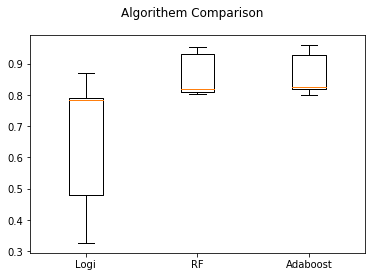

In [282]:
fig = plt.figure()
fig.suptitle('Algorithem Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [280]:
xtrain.head()

,final_weight,education_num,capital_gain,capital_loss,hoursperweek,age_Adult,age_Old,age_Older,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States
7665,193219,9,0,0,35,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7086,175130,9,0,0,45,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
11712,214242,10,0,0,40,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,1
17876,164309,9,0,0,35,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17493,170354,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [101]:
probas1_ = RF.predict_proba(xtest)

In [106]:
probas1_

array([[0.28966494, 0.71033506],
       [0.4180882 , 0.5819118 ],
       [0.95625165, 0.04374835],
       ...,
       [0.79283562, 0.20716438],
       [0.27742033, 0.72257967],
       [0.82194965, 0.17805035]])

In [107]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, probas1_[:, 1])

In [110]:
from sklearn.metrics import roc_curve,roc_auc_score, auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.898274


In [112]:
roc_auc_score(ytest, ypred_RF)

0.8052476301108088

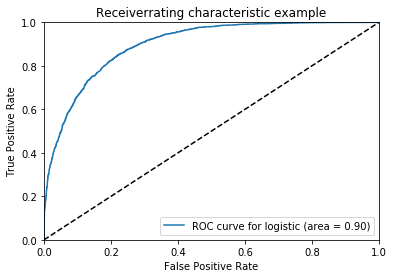

In [113]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve for logistic (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()